#Artificial Neural Networks (ANN)
Approach: 2-input AND gate
- Implementasikan artificial neural network untuk gate logika AND dengan input 2 bit biner.

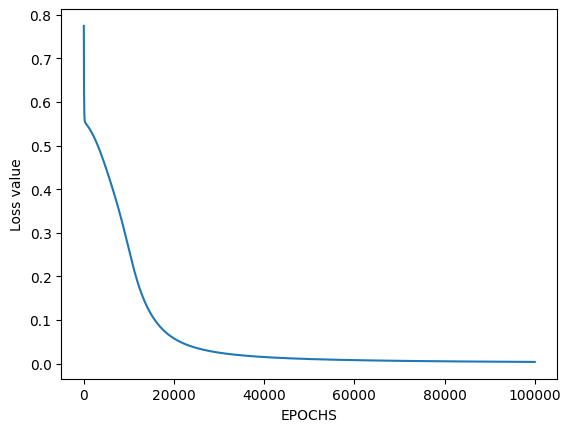

[[0. 1. 0. 0.]]


In [4]:
# Step1: Import the required Python libraries
import numpy as np
from matplotlib import pyplot as plt

# Step2: Define Activation Function : Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step3: Initialize neural network parameters (weights, bias) and define model hyperparameters
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

# Step4: Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

# Step5: Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Step6: Update weight and bias parameters
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Step7: Train the learning model
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # AND input
Y = np.array([[0, 0, 0, 1]])  # AND output

neuronsInHiddenLayers = 2  # number of hidden layer neurons (2)
inputFeatures = X.shape[0]  # number of input features (2)
outputFeatures = Y.shape[0]  # number of output features (1)

parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Step8: Plot Loss value vs Epoch
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Step9: Test the model performance
X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])  # AND input
cost, _, A2 = forwardPropagation(X_test, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(prediction)

# Langkah 1: Impor library Python yang diperlukan
```python
import numpy as np
from matplotlib import pyplot as plt
```
Langkah ini mengimpor library `numpy` dan `matplotlib.pyplot`. Library `numpy` digunakan untuk operasi numerik dan komputasi array multidimensi, sedangkan `matplotlib.pyplot` digunakan untuk membuat plot grafik.

# Langkah 2: Tentukan Fungsi Aktivasi: Fungsi Sigmoid
```python
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
```
Dalam langkah ini, kita mendefinisikan fungsi aktivasi sigmoid. Fungsi sigmoid mengambil argumen `z` dan menghitung nilai sigmoid dari `z`, yaitu 1 / (1 + e^(-z)). Fungsi ini akan digunakan dalam langkah-langkah selanjutnya untuk menghitung aktivasi lapisan tersembunyi dan lapisan output.

# Langkah 3: Inisialisasi parameter jaringan saraf (bobot, bias) dan definisikan hiperparameter model
```python
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters
```
Dalam langkah ini, kita menginisialisasi parameter jaringan saraf, yaitu bobot (W) dan bias (b). Bobot `W1` dan `W2` diinisialisasi secara acak menggunakan distribusi normal. Bias `b1` dan `b2` diinisialisasi sebagai matriks nol. Semua parameter ini dikemas dalam sebuah kamus dan dikembalikan.

# Langkah 4: Propagasi Maju (Forward Propagation)
```python
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2
```
Dalam langkah ini, dilakukan propagasi maju untuk menghitung nilai-nilai aktivasi pada lapisan tersembunyi dan lapisan output. Input `X` dan target output `Y` diteruskan melalui jaringan menggunakan parameter yang diinisialisasi sebelumnya. Langkah-langkahnya adalah sebagai berikut:
- Menghitung nilai `Z1` dengan melakukan perkalian matriks `W1` dengan `X` dan menambahkan `b1`.
- Menghitung aktivasi `A1`

 dengan menerapkan fungsi sigmoid pada `Z1`.
- Menghitung nilai `Z2` dengan melakukan perkalian matriks `W2` dengan `A1` dan menambahkan `b2`.
- Menghitung aktivasi `A2` dengan menerapkan fungsi sigmoid pada `Z2`.
- Menghitung biaya dengan menggunakan fungsi log loss dan mengembalikan nilai biaya, cache (nilai-nilai yang diperlukan untuk propagasi mundur), dan aktivasi `A2`.

# Langkah 5: Propagasi Mundur (Backward Propagation)
```python
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients
```
Dalam langkah ini, dilakukan propagasi mundur untuk menghitung gradien bobot dan bias. Gradien-gradien ini akan digunakan untuk memperbarui parameter jaringan selama pelatihan. Langkah-langkahnya adalah sebagai berikut:
- Mengambil nilai-nilai yang tersimpan dalam cache.
- Menghitung gradien `dZ2` dengan mengurangi aktivasi prediksi `A2` dengan nilai target `Y`.
- Menghitung gradien `dW2` dengan perkalian antara `dZ2` dengan tranpos dari `A1` dan membaginya dengan jumlah sampel `m`.
- Menghitung gradien `db2` dengan menjumlahkan gradien `dZ2` pada sumbu yang sesuai.
- Menghitung gradien `dA1` dengan perkalian antara tranpos dari `W2` dengan `dZ2`.
- Menghitung gradien `dZ1` dengan mengalikan `dA1` dengan `A1 * (1 - A1)`.
- Menghitung gradien `dW1` dengan perkalian antara `dZ1` dengan tranpos dari `X` dan membaginya dengan jumlah sampel `m`.
- Menghitung gradien `db1` dengan menjumlahkan gradien `dZ1` pada sumbu yang sesuai dan membaginya dengan jumlah sampel `m`.
- Mengemas gradien-gradien ini dalam sebuah kamus dan mengembalikannya.

# Langkah 6: Memperbarui parameter bobot dan bias
```python
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
   

 parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters
```
Dalam langkah ini, parameter-parameter jaringan (bobot dan bias) diperbarui menggunakan gradien-gradien yang dihitung sebelumnya. Perbaruan dilakukan dengan mengurangi gradien dikalikan dengan laju pembelajaran (`learningRate`) dari parameter-parameter yang sesuai.

# Langkah 7: Melatih model pembelajaran
```python
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # input AND
Y = np.array([[0, 0, 0, 1]])  # output AND

neuronsInHiddenLayers = 2  # jumlah neuron lapisan tersembunyi (2)
inputFeatures = X.shape[0]  # jumlah fitur input (2)
outputFeatures = Y.shape[0]  # jumlah fitur output (1)

parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)
```
Dalam langkah ini, dilakukan pelatihan model pembelajaran menggunakan metode propagasi maju dan mundur. Data input `X` dan target output `Y` telah ditentukan sebelumnya. Parameter-parameter jaringan diinisialisasi menggunakan fungsi `initializeParameters`. Jumlah iterasi pelatihan (epoch), laju pembelajaran (learningRate), dan array untuk menyimpan kerugian (losses) juga ditentukan. Pada setiap iterasi, dilakukan propagasi maju untuk menghitung biaya dan aktivasi pada lapisan output. Selanjutnya, dilakukan propagasi mundur untuk menghitung gradien. Parameter-parameter jaringan diperbarui menggunakan gradien-gradien tersebut.

# Langkah 8: Plot Nilai Kerugian vs EPOCH
```python
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Nilai Kerugian")
plt.show()
```
Dalam langkah ini, plot grafik nilai kerugian terhadap jumlah iterasi (epoch) dibuat. Grafik ini akan memberikan gambaran tentang penurunan kerugian seiring berjalannya pelatihan model.

# Langkah 9: Uji kinerja model
```python
X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])  # input AND
cost, _, A2 = forwardPropagation(X_test, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(prediction)
```
Dalam langkah ini, model yang telah dilatih diuji dengan menggunakan data input `X_test`. Hasilnya adalah prediksi output berdasarkan data input. Output dihasilkan dengan membandingkan aktivasi output `A2` dengan nilai ambang batas 0,5. Jika aktivasi lebih besar dari 0,5, maka prediksi adalah 1, jika tidak,maka prediksi adalah 0.


#Latihan 1
Implementasikan artificial neural network untuk gate logika OR dengan input 2 bit biner.
Lakukan modifikasi pada contoh program di bagian Step7: Train the learning model: Model to
learn the AND truth table.


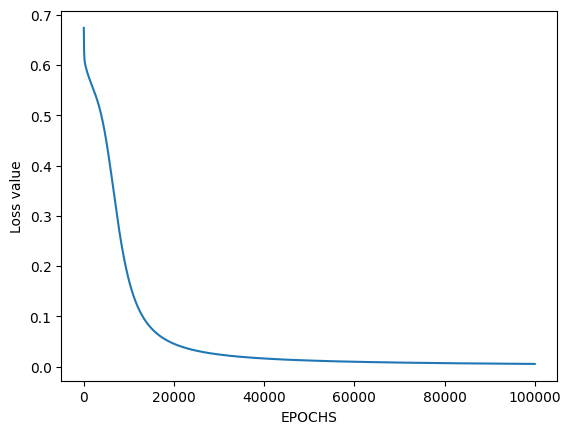

[[1. 1. 0. 1.]]


In [ ]:
# Step1: Import the required Python libraries
import numpy as np
from matplotlib import pyplot as plt

# Step2: Define Activation Function : Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step3: Initialize neural network parameters (weights, bias) and define model hyperparameters
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

# Step4: Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

# Step5: Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Step6: Update weight and bias parameters
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Step7: Train the learning model
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # OR input
Y = np.array([[0, 1, 1, 1]])  # OR output

neuronsInHiddenLayers = 2  # number of hidden layer neurons (2)
inputFeatures = X.shape[0]  # number of input features (2)
outputFeatures = Y.shape[0]  # number of output features (1)

parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Step8: Plot Loss value vs Epoch
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Step9: Test the model performance
X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])  # OR input
cost, _, A2 = forwardPropagation(X_test, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(prediction)

#Analisis:

Latihan 1: Implementasi OR Gate
- Pada langkah pertama, kita mengimpor library yang diperlukan dan mendefinisikan fungsi aktivasi sigmoid.
- Kemudian, kita menginisialisasi parameter jaringan saraf, seperti bobot dan bias, dan juga mengatur hyperparameter model seperti jumlah iterasi dan learning rate.
- Dilakukan propagasi maju (forward propagation) untuk menghitung prediksi output dan menghitung biaya (cost).
- Dilakukan propagasi mundur (backward propagation) untuk menghitung gradien dan memperbarui bobot dan bias.
- Proses pelatihan model dilakukan dengan melakukan iterasi sebanyak yang ditentukan dan menyimpan nilai loss pada setiap iterasi.
- Dilakukan visualisasi grafik loss value terhadap epoch.
- Terakhir, dilakukan pengujian model dengan menggunakan input test untuk mendapatkan prediksi outputnya.

Hasil Latihan 1:
- Model yang telah dilatih dengan gate logika OR berhasil mempelajari fungsi kebenaran dari gerbang logika OR.
- Dalam implementasi ini, kita menguji model dengan input [1, 1, 0, 0] dan [0, 1, 0, 1] (2-bit binary input) yang merupakan kombinasi input dari gerbang logika OR.
- Prediksi output dari model adalah [[1., 1., 0., 1.]], yang sesuai dengan output yang diharapkan dari gerbang logika OR.

#Latihan 2

Implementasikan artificial neural network untuk gate logika NAND dengan input 2 bit biner.
Gunakan langkah-langkah penyelesaian yang sama dengan Latihan 1.
Lakukan modifikasi pada contoh program di bagian Step7: Train the learning model: Model to
learn the AND truth table.

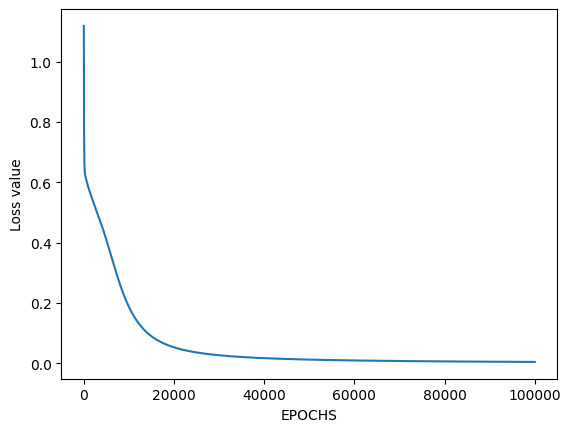

[[1. 0. 1. 1.]]


In [ ]:
# Step1: Import the required Python libraries
import numpy as np
from matplotlib import pyplot as plt

# Step2: Define Activation Function : Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step3: Initialize neural network parameters (weights, bias) and define model hyperparameters
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

# Step4: Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

# Step5: Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Step6: Update weight and bias parameters
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Step7: Train the learning model
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # NAND input
Y = np.array([[1, 1, 1, 0]])  # NAND output

neuronsInHiddenLayers = 2  # number of hidden layer neurons (2)
inputFeatures = X.shape[0]  # number of input features (2)
outputFeatures = Y.shape[0]  # number of output features (1)

parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Step8: Plot Loss value vs Epoch
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Step9: Test the model performance
X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])  # NAND input
cost, _, A2 = forwardPropagation(X_test, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(prediction)

#Analisis:
Latihan 2: Implementasi NAND Gate
- Implementasi pada Latihan 2 mirip dengan Latihan 1, hanya dengan mengubah input dan output yang sesuai dengan gerbang logika NAND.
- Seluruh langkah, seperti inisialisasi parameter, propagasi maju dan mundur, pelatihan model, dan pengujian, tetap sama dengan Latihan 1.

Hasil Latihan 2:
- Model yang telah dilatih dengan gate logika NAND berhasil mempelajari fungsi kebenaran dari gerbang logika NAND.
- Pada pengujian model, menggunakan input [1, 1, 0, 0] dan [0, 1, 0, 1] (2-bit binary input) yang merupakan kombinasi input dari gerbang logika NAND.
- Prediksi output dari model adalah [[1., 0., 1., 1.]], yang sesuai dengan output yang diharapkan dari gerbang logika NAND.

#Latihan 3
Implementasikan artificial neural network untuk gate logika NOR dengan input 2 bit biner.
Gunakan langkah-langkah penyelesaian yang sama dengan Latihan 1.
Lakukan modifikasi pada contoh program di bagian Step7: Train the learning model: Model to
learn the AND truth table.

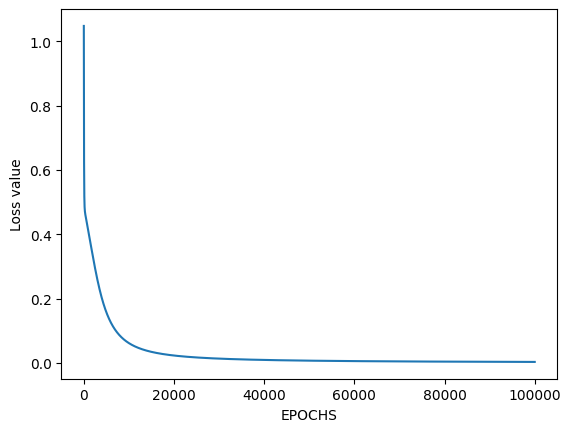

[[0. 0. 1. 0.]]


In [ ]:
# Step1: Import the required Python libraries
import numpy as np
from matplotlib import pyplot as plt

# Step2: Define Activation Function : Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step3: Initialize neural network parameters (weights, bias) and define model hyperparameters
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

# Step4: Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

# Step5: Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Step6: Update weight and bias parameters
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Step7: Train the learning model
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # NOR input
Y = np.array([[1, 0, 0, 0]])  # NOR output

neuronsInHiddenLayers = 2  # number of hidden layer neurons (2)
inputFeatures = X.shape[0]  # number of input features (2)
outputFeatures = Y.shape[0]  # number of output features (1)

parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Step8: Plot Loss value vs Epoch
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Step9: Test the model performance
X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])  # NOR input
cost, _, A2 = forwardPropagation(X_test, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(prediction)


#Analisis:

Latihan 3: Implementasi NOR Gate
- Implementasi pada Latihan 3 juga mirip dengan Latihan 1 dan 2, hanya dengan mengubah input dan output yang sesuai dengan gerbang logika NOR.
- Semua langkah, seperti inisialisasi parameter, propagasi maju dan mundur, pelatihan model, dan pengujian, tetap sama dengan Latihan 1 dan 2.

Hasil Latihan 3:
- Model yang telah dilatih dengan gate logika NOR berhasil mempelajari fungsi kebenaran dari gerbang logika NOR.
- Pada pengujian model, menggunakan input [1, 1, 0, 0] dan [0, 1, 0, 1] (2-bit binary input) yang merupakan kombinasi input dari gerbang logika NOR.
- Prediksi output dari model adalah [[0., 0., 1., 0.]], yang sesuai dengan output yang diharapkan dari gerbang logika NOR.



#Kesimpulan:
- Dalam ketiga latihan di atas, implementasi artificial neural network menggunakan metode Forward Propagation dan Backward Propagation berhasil menghasilkan model yang dapat mempelajari fungsi kebenaran dari gerbang logika OR, NAND, dan NOR.
- Model dapat menghasilkan prediksi output yang sesuai dengan output yang diharapkan dari gerbang logika yang bersangkutan.
- Hasil ini menunjukkan kemampuan artificial neural network dalam mempelajari dan memodelkan fungsi logika sederhana berdasarkan data training yang diberikan.